In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

Read Data

In [2]:
file_name = "customer_churn.xlsx"
df = pd.read_excel(file_name,sheet_name='Telco_Churn')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


Shape

In [3]:
df.shape

(7043, 31)

In [4]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [5]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [29]:
non_churners = df[df['Churn Value']==0]
non_churners.shape

(5163, 31)

In [30]:
churners = df[df['Churn Value']!=0]
churners.shape

(1869, 31)

In [7]:
def plot_bar_chart(df,x_col,y_col,title='',figsize=(10,5)):
        """
        function to plot charts 
        i/p : df,x_col,y_col 
        o/p : saves file in local directory
        
        """

        sns.set_theme(style="whitegrid", palette="pastel")

        plt.figure(figsize = figsize) # setting the size of the output


        sns.barplot( data = df,
                        x = x_col,
                        y = y_col
                )

        # We can also adjust the labels
        plt.xticks(rotation=45, # rotating labels
                horizontalalignment = 'right', # aligning them with the bars
                fontweight = 'light',
                fontsize = 'large' # setting the fonts
                )

        plt.title(title) # naming the plot

        plt.savefig('plot.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

        plt.show()

In [ ]:
plot_bar_chart(df_age,'Senior_citizen','count',title='churn vs Age')

# Churning Demographics

(1869, 31)

### Age vs Churn

In [9]:
df_age = df_churned['Senior Citizen'].value_counts().reset_index()
df_age.rename(columns={'index':'Senior_citizen','Senior Citizen':'count'}, inplace=True)
df_age.head()

,Senior_citizen,count
0,No,1393
1,Yes,476


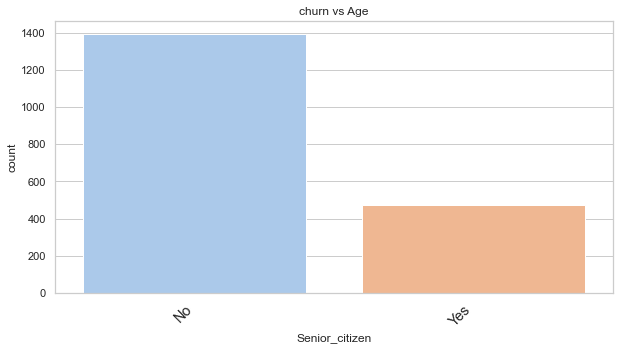

In [10]:
plot_bar_chart(df_age,'Senior_citizen','count',title='churn vs Age')

### Gender vs churn

In [11]:
df_gender = df_churned['Gender'].value_counts().reset_index()
df_gender.rename(columns={'index':'gender','Gender':'count'}, inplace=True)
df_gender.head()

,gender,count
0,Female,939
1,Male,930


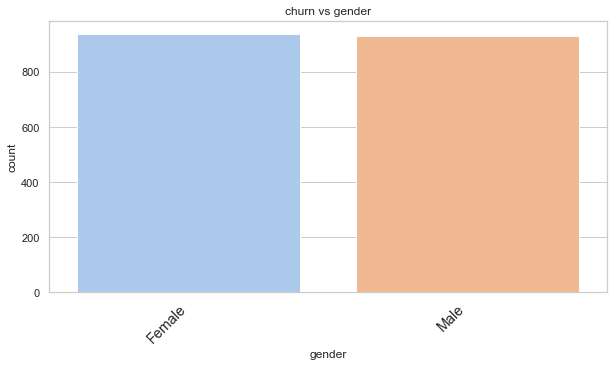

In [12]:
plot_bar_chart(df_gender,'gender','count',title='churn vs gender')

### Family Makeup

Partner status

In [13]:
df_partner = df_churned['Partner'].value_counts().reset_index()
df_partner.rename(columns={'index':'partner','Partner':'count'}, inplace=True)
df_partner.head()

,partner,count
0,No,1200
1,Yes,669


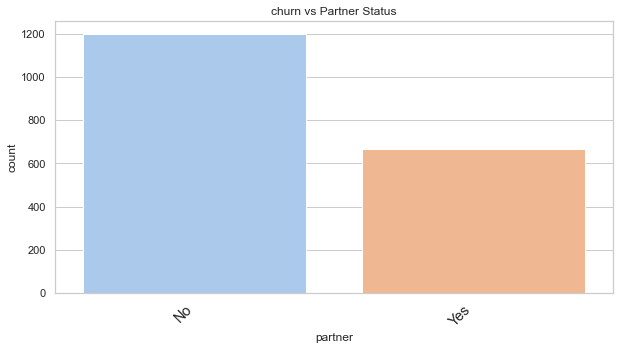

In [14]:
plot_bar_chart(df_partner,'partner','count',title='churn vs Partner Status')

Dependents

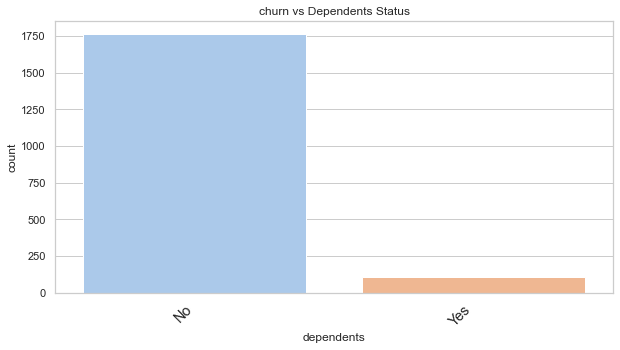

In [15]:
df_dependents = df_churned['Dependents'].value_counts().reset_index()
df_dependents.rename(columns={'index':'dependents','Dependents':'count'}, inplace=True)
df_dependents.head()
plot_bar_chart(df_dependents,'dependents','count',title='churn vs Dependents Status')

<li> Customers with either no partners or dependents are more likely to churn 

In [16]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

## Factors affecting churning

In [17]:
churn_factors = ['Total Charges',
                'Monthly Charges',
                'Tenure Months',
                'Gender',
                'Churn Value',
                'Dependents',
                'Partner'
                
                    ]

def feature_eng(df):
    
        df = df.drop(df[df['Total Charges'] == ' '].index)
        df['Churn Reason'] = df['Churn Reason'].fillna(df['Churn Reason'].mode()[0])
        df['Total Charges'] = df['Total Charges'].astype('float')
        df['Monthly Charges'] = df['Monthly Charges'].astype('float')
        

        return df

df  =feature_eng(df)

print(df.columns)

churn_corr=df[churn_factors].corr()
churn_corr

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')


,Total Charges,Monthly Charges,Tenure Months,Churn Value
Total Charges,1.000000,0.651065,0.825880,-0.199484
Monthly Charges,0.651065,1.000000,0.246862,0.192858
Tenure Months,0.825880,0.246862,1.000000,-0.354049
Churn Value,-0.199484,0.192858,-0.354049,1.000000


## Why are they Churning?

In [18]:
df_reason = df_churned['Churn Reason'].value_counts().reset_index()
df_reason.rename(columns={'index':'Reason','Churn Reason':'count'}, inplace=True)
df_reason.head()


,Reason,count
0,Attitude of support person,192
1,Competitor offered higher download speeds,189
2,Competitor offered more data,162
3,Don't know,154
4,Competitor made better offer,140


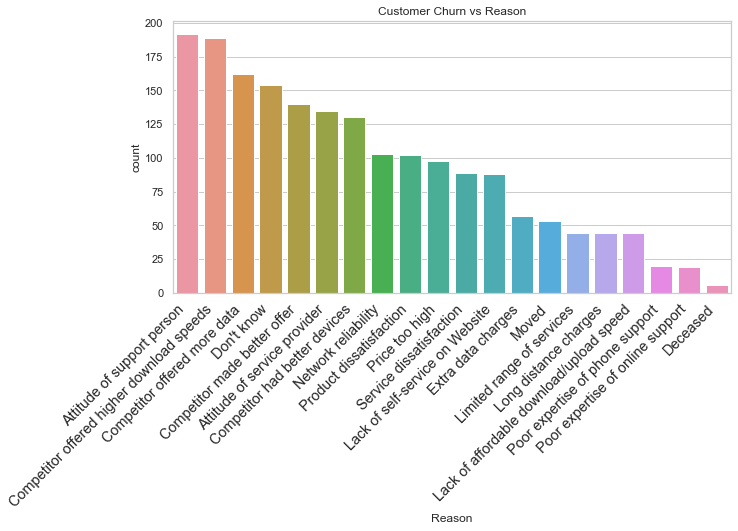

In [19]:
plot_bar_chart(df_reason,'Reason','count',title='Customer Churn vs Reason')

In [20]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [21]:
df_charges = df_churned['Total Charges'].value_counts().reset_index()
df_charges.rename(columns={'index':'charges','Total Charges':'count'}, inplace=True)
df_charges.max()

charges    8684.8
count         6.0
dtype: float64

### Total Charges vs Churn

In [22]:
df_total_charges = pd.DataFrame(columns=['charges_bin'])
df_total_charges['charges_bin'] = pd.cut(df_charges['charges'], [0, 500, 1000,2000,4000,6000,8000])
df_total_charges = df_total_charges.value_counts().to_frame().reset_index()

df_total_charges.rename(columns={'charges_bin':'charges',0:'count'}, inplace=True)
df_total_charges



,charges,count
0,"(0, 500]",697
1,"(2000, 4000]",285
2,"(1000, 2000]",268
3,"(500, 1000]",239
4,"(4000, 6000]",155
5,"(6000, 8000]",85


In [23]:
df_total_charges.rename(columns={'charges_bin':'charges','0':'count'}, inplace=True)
df_total_charges.columns

Index(['charges', 'count'], dtype='object')

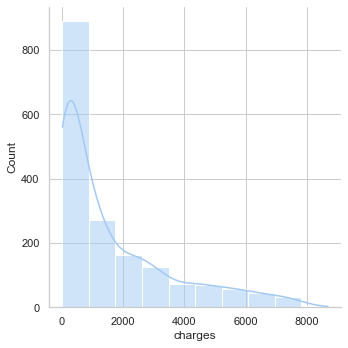

In [24]:
sns.displot(df_charges['charges'].T,bins=10,kde=True)
plt.show()

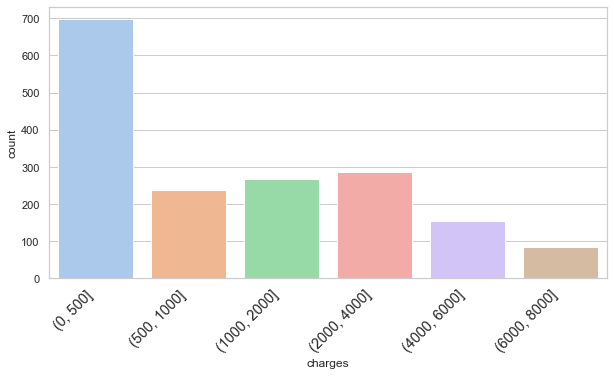

In [25]:
plot_bar_chart(df_total_charges,'charges','count')

In [26]:
df[df['Churn Reason'].isnull()].shape

(0, 31)